In [2]:
import numpy as np
import sklearn
from sklearn.kernel_approximation import RBFSampler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [4]:
class Kernel():
    def __init__(self):
        pass

    def __call__(self, x):
        return x

    def feature_map(self, x):
        return x

def sample_rff_weights(nin, nout, sigma):
    return np.random.normal(loc=0, scale=sigma, size=(nin, nout))

def sample_rff_b(nin):
    return np.random.uniform(0, 2 * np.pi, size=(nin,1))


class RBFKernel():
    def __init__(self, nin, nout, sigma, static=True):
        self.gamma = 1 / (2 * sigma * sigma)
        self.rff_weights = sample_rff_weights(nin, nout, sigma)
        self.b = sample_rff_b(nin)
        self.define_feature_map(static, nout)

    def define_feature_map(self, static, nout):
        if static:
            def feature_map(x):
                z = np.dot(x, self.rff_weights)
                return np.cos(z)
            self.feature_map=feature_map
        else:
            def feature_map(x, nout):
                sampler = RBFSampler(gamma=self.gamma, n_components=nout, random_state=RANDOM_STATE)
                return sampler.fit_transform(x)
            self.feature_map=feature_map

    def __call__(self, x):
        K = sklearn.metrics.pairwise.rbf_kernel(x, gamma=self.gamma)
        return K


class LinearKernel():
    def __init__(self):
        pass

    def __call__(self, z):
        if len(z.shape) == 1:
            z = z.reshape(z.shape[0], 1).copy()
        return np.dot(z, z.T)
    
    def feature_map(self, z):
        return z

In [47]:
class ReLUKernel():
    def __init__(self) -> None:
        pass

    def __call__(self, z):
        return np.dot(np.maximum(z, 0), np.maximum(z, 0).T)
    
    def feature_map(self, z):
        return np.maximum(z, 0)
    

class LeakyReLUKernel():
    def __init__(self, lambd) -> None:
        self.lambd = lambd

    def __call__(self, z):
        return np.dot(np.maximum(z, self.lambd * z), np.maximum(z, self.lambd * z).T)
    
    def feature_map(self, z):
        return np.maximum(z, self.lambd * z)
    

class SigmoidKernel():
    def __init__(self, gamma, c) -> None:
        self.gamma = gamma
        self.constant = c

    def __call__(self, z):
        return np.tanh(self.gamma * np.dot(z, z.T) + self.constant)
    
    def feature_map(self, z):
        return 1 / (1 + np.exp(-z))


In [33]:
def plot_kernel(data, kernel):
    plt.imshow(kernel(data), cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [34]:
x = load_iris().data

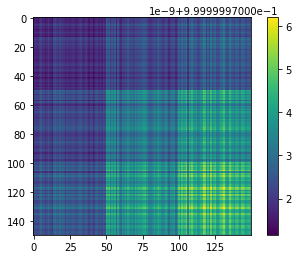

In [53]:
plot_kernel(x, SigmoidKernel(0.001, 9))